In [3]:
import pandas as pd

df = pd.read_csv('2015-street-tree-census-tree-data.csv')

In [161]:
pd.set_option('display.max_columns', None)  # Отображение всех столбцов
pd.set_option('display.max_rows', 10)  # Отображение всех строк
pd.set_option('display.width', 0)  # Полная ширина вывода
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,2015-08-18T00:00:00.000,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,2015-08-29T00:00:00.000,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,2015-08-22T00:00:00.000,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,2015-08-29T00:00:00.000,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [18]:
# as we want to know tree health, absent of the information about health is critical
df_cleaned = df_cleaned.dropna(subset=['health'])
# missing data is so small that we can remove it
df_cleaned = df_cleaned.dropna(subset=['spc_latin'])
df_cleaned = df_cleaned.dropna(subset=['spc_common'])
df_cleaned = df_cleaned.dropna(subset=['sidewalk'])

In [20]:
df_cleaned['steward'] = df_cleaned['steward'].fillna('None')

In [24]:
df_cleaned['guards'] = df_cleaned['guards'].fillna('None')

In [29]:
df_cleaned['problems'] = df_cleaned['problems'].fillna('None')

In [31]:
# В пределах одного почтового индекса (postcode) и borough council district и census tract обычно одинаковые или изменяются предсказуемо.
df_cleaned['council district'] = df_cleaned.groupby(['postcode', 'borough'])['council district'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))
df_cleaned['census tract'] = df_cleaned.groupby(['postcode', 'borough'])['census tract'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

In [105]:
df_cleaned['council district'] = df_cleaned['council district'].fillna('None')
df_cleaned['census tract'] = df_cleaned['census tract'].fillna('None')

In [106]:
df_cleaned.isnull().sum()

block_id            0
tree_dbh            0
curb_loc            0
health              0
spc_latin           0
spc_common          0
steward             0
guards              0
sidewalk            0
user_type           0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
postcode            0
zip_city            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
council district    0
census tract        0
dtype: int64

In [102]:
# print(df_cleaned.dtypes)
# print(df_cleaned.head)
# df_cleaned['trunk_wire']
# df_cleaned = df_cleaned.drop(columns=['status','stump_diam'])
# df_cleaned = df_cleaned.drop(columns=['tree_id', 'created_at', 'latitude', 'longitude', 'x_sp', 'y_sp', 'boro_ct', 'nta', 'nta_name', 'address', 'bin', 'bbl', 'state', 'problems','status','stump_diam'])

In [155]:
df_cleaned['census tract'].value_counts()

census tract
176      3595
20801    3521
198      3304
138      2922
226      2648
         ... 
8602       10
25902       9
716         4
22302       3
793         3
Name: count, Length: 1314, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['health'] = le.fit_transform(df_cleaned['health'])
df_cleaned['curb_loc'] = le.fit_transform(df_cleaned['curb_loc'])
df_cleaned['status'] = le.fit_transform(df_cleaned['status'])
df_cleaned['spc_latin'] = le.fit_transform(df_cleaned['spc_latin'])
df_cleaned['spc_common'] = le.fit_transform(df_cleaned['spc_common'])
df_cleaned['steward'] = le.fit_transform(df_cleaned['steward'])
df_cleaned['guards'] = le.fit_transform(df_cleaned['guards'])
df_cleaned['sidewalk'] = le.fit_transform(df_cleaned['sidewalk'])
df_cleaned['user_type'] = le.fit_transform(df_cleaned['user_type'])
df_cleaned['root_stone'] = le.fit_transform(df_cleaned['root_stone'])
df_cleaned['root_grate'] = le.fit_transform(df_cleaned['root_grate'])
df_cleaned['root_other'] = le.fit_transform(df_cleaned['root_other'])
df_cleaned['trunk_wire'] = le.fit_transform(df_cleaned['trunk_wire'])
df_cleaned['trnk_light'] = le.fit_transform(df_cleaned['trnk_light'])
df_cleaned['trnk_other'] = le.fit_transform(df_cleaned['trnk_other'])
df_cleaned['brch_light'] = le.fit_transform(df_cleaned['brch_light'])

df_cleaned['brch_shoe'] = le.fit_transform(df_cleaned['brch_shoe'])
df_cleaned['brch_other'] = le.fit_transform(df_cleaned['brch_other'])
df_cleaned['zip_city'] = le.fit_transform(df_cleaned['zip_city'])
df_cleaned['borough'] = le.fit_transform(df_cleaned['borough'])

In [121]:
df_cleaned = df_cleaned[(df_cleaned['council district'] != 'None') & (df_cleaned['census tract'] != 'None')]
# df_cleaned['council district'] = df_cleaned['council district'].astype('int64')
# df_cleaned['census tract'] = df_cleaned['census tract'].astype('int64')
# df_cleaned['council district'] = le.fit_transform(df_cleaned['council district'])
# df_cleaned['census tract'] = le.fit_transform(df_cleaned['census tract'])

In [125]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Функция для вычисления коэффициента Крамера V
def cramers_v(confusion_matrix):
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    return np.sqrt(chi2 / (confusion_matrix.sum().sum() * (min(confusion_matrix.shape) - 1)))

# Преобразуем все категориальные столбцы в числовые (если это еще не сделано)
df_encoded = df_cleaned.apply(LabelEncoder().fit_transform)

# Столбец, с которым будем считать корреляцию (в данном случае 'health')
target_column = 'health'

# Строим пустую матрицу для корреляции
corr_matrix = pd.DataFrame(np.zeros((1, df_encoded.shape[1])), columns=df_encoded.columns)

# Заполняем только для столбца health
for col in df_encoded.columns:
    if col != target_column:  # Корреляцию с самим собой мы не считаем
        confusion_matrix = pd.crosstab(df_encoded[target_column], df_encoded[col])
        corr_matrix.loc[0, col] = cramers_v(confusion_matrix)

# Выводим корреляционную информацию для health
print(corr_matrix.transpose().sort_values(by=0, ascending=False))  # сортируем по значениям

                         0
block_id          0.559263
brch_other        0.152386
census tract      0.149573
trnk_other        0.134540
spc_common        0.113580
spc_latin         0.113580
postcode          0.108366
community board   0.082808
zip_city          0.074404
st_assem          0.071220
cncldist          0.067617
council district  0.066876
tree_dbh          0.064078
root_other        0.054389
st_senate         0.050189
borough           0.032627
borocode          0.032627
root_stone        0.030402
trunk_wire        0.027992
user_type         0.025301
brch_light        0.025078
root_grate        0.023435
guards            0.021001
sidewalk          0.020293
trnk_light        0.008088
steward           0.007938
brch_shoe         0.007695
curb_loc          0.005799
health            0.000000


In [127]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 9.9 MB/s eta 0:00:00a 0:00:01


Распределение классов:
health
1    0.810908
0    0.147972
2    0.041120
Name: proportion, dtype: float64


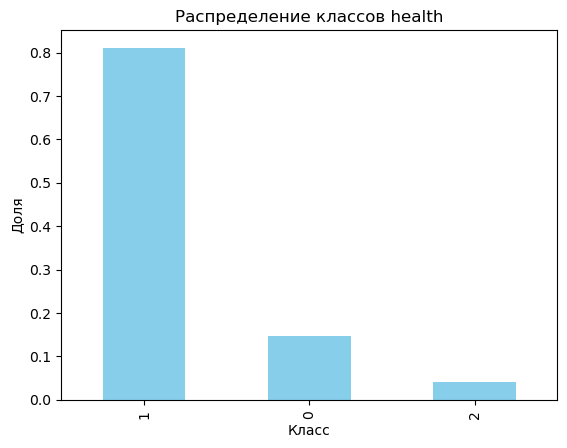

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Проверка балансировки классов
class_distribution = df_cleaned['health'].value_counts(normalize=True)
print("Распределение классов:")
print(class_distribution)

# Визуализация распределения классов
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение классов health')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.show()

Accuracy: 0.8161110770363101
              precision    recall  f1-score   support

           0       0.50      0.06      0.12     19365
           1       0.82      0.99      0.90    105657
           2       0.58      0.06      0.10      5410

    accuracy                           0.82    130432
   macro avg       0.64      0.37      0.37    130432
weighted avg       0.77      0.82      0.75    130432



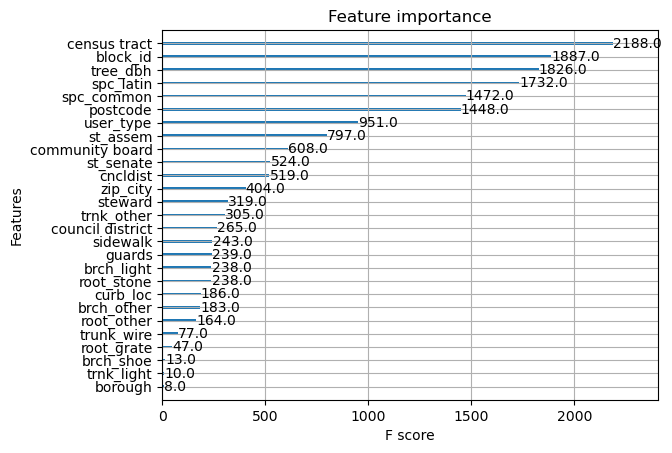

F1-score для класса 0: 0.11511186347623187
Precision для класса 0: 0.5048154093097913
Recall для класса 0: 0.06496256132197263


In [143]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Предполагаем, что df - это ваш датафрейм с данными
X = df_cleaned.drop('health', axis=1)  # все признаки
y = df_cleaned['health']  # целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Feature importance (если нужно)
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

from sklearn.metrics import f1_score, precision_score, recall_score

print("F1-score для класса 0:", f1_score(y_test, y_pred, average=None)[0])
print("Precision для класса 0:", precision_score(y_test, y_pred, average=None)[0])
print("Recall для класса 0:", recall_score(y_test, y_pred, average=None)[0])

In [141]:
y_train.value_counts()

health
1    423183
0     77136
2     21407
Name: count, dtype: int64

Accuracy: 0.7144949092247301
              precision    recall  f1-score   support

           0       0.26      0.23      0.25     19365
           1       0.85      0.82      0.84    105657
           2       0.15      0.31      0.20      5410

    accuracy                           0.71    130432
   macro avg       0.42      0.46      0.43    130432
weighted avg       0.74      0.71      0.72    130432



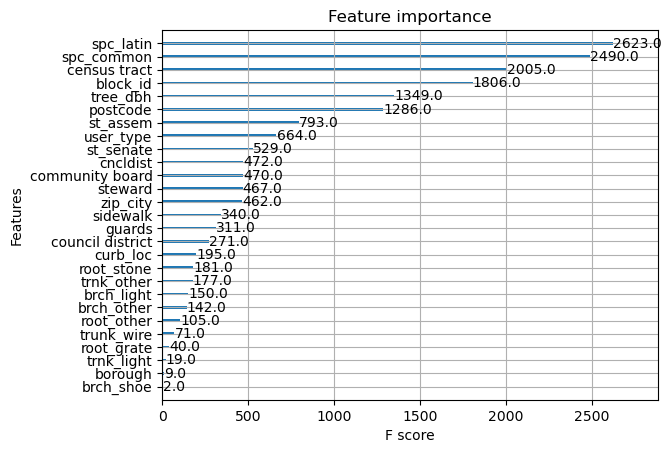

In [137]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Предполагаем, что df - это ваш датафрейм с данными
X = df_cleaned.drop('health', axis=1)  # все признаки
y = df_cleaned['health']  # целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение SMOTE к обучающим данным
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Инициализация и обучение модели XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', 
                          num_class=3,
                          eval_metric='mlogloss', 
                          random_state=42)
model.fit(X_resampled, y_resampled)

# Оценка модели
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Feature importance (если нужно)
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ....................learning_rate=0.01, max_depth=3; total time=  15.8s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=  18.7s
[CV] END .....................learning_rate=0.2, max_depth=5; total time=  17.5s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=  12.3s
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=200; total time=  41.0s
Лучшие гиперпараметры:  {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.7397034470068695
              precision    recall  f1-score   support

           0       0.30      0.26      0.28     19365
           1       0.86      0.85      0.85    105657
           2       0.18      0.30      0.22      5410

    accuracy                           0.74    130432
   macro avg       0.45      0.47      0.45    130432
weighted avg       0.75      0.74      0.74    130432



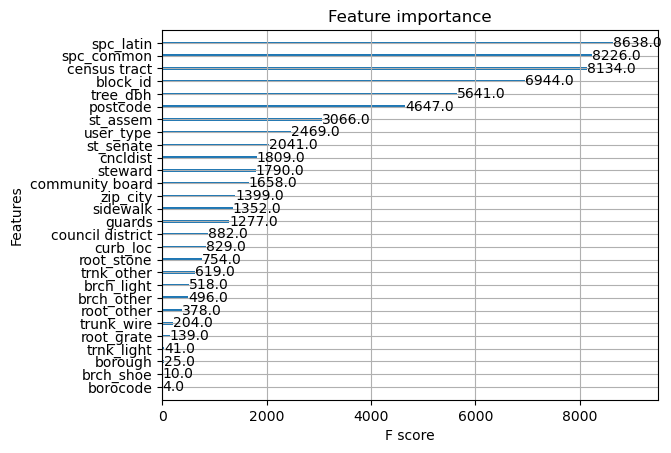

In [148]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Предполагаем, что df_cleaned — это ваш датафрейм с данными
X = df_cleaned.drop('health', axis=1)  # все признаки
y = df_cleaned['health']  # целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение SMOTE к обучающим данным
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Инициализация модели XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', 
                          num_class=3,
                          eval_metric='mlogloss', 
                          random_state=42)

# Определение диапазонов гиперпараметров для поиска
param_grid = {
    'max_depth': [7],  # Максимальная глубина дерева
    'learning_rate': [0.2],  # Скорость обучения
    'n_estimators': [200],  # Количество деревьев
    # 'subsample': [0.8, 0.9, 1.0],  # Пропорция случайных данных для обучения каждого дерева
    # 'colsample_bytree': [0.8, 0.9, 1.0],  # Пропорция случайных признаков для каждого дерева
    'gamma': [0.1],  # Регуляризация по сложности дерева
    # 'min_child_weight': [1, 3, 5]  # Минимальный вес для листа дерева
}

# Настроим GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3, 
                           verbose=2, 
                           n_jobs=-1)

# Обучаем GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Выводим лучшие гиперпараметры
print("Лучшие гиперпараметры: ", grid_search.best_params_)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оценка точности модели
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Feature importance (если нужно)
xgb.plot_importance(best_model)
plt.show()
